# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('diabetes.csv')
X=data.drop('Outcome',axis=1)
y=data['Outcome']

### Train, Validation, Test data split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

### Maximum validation accuracy is obtained at k=5:

In [4]:
accuracy=[]
for i in np.arange(1,100,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train) 
  y_pred= knn.predict(X_val)
  accuracy.append((i,accuracy_score(y_pred,y_val)))
accuracy.sort(key=lambda x: x[1],reverse=True)
print('maximum validation accuracy is obtained at k = '+str(accuracy[0][0]))

maximum validation accuracy is obtained at k = 5


## TEST SET 

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
y_pred= knn.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print('The test set accuracy is ',accuracy)

The test set accuracy is  0.7142857142857143


# RESULTS

**1) The best k value is 5.**

**2) The test set accuracy is 0.71428 for k=5**

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



(1797, 64)


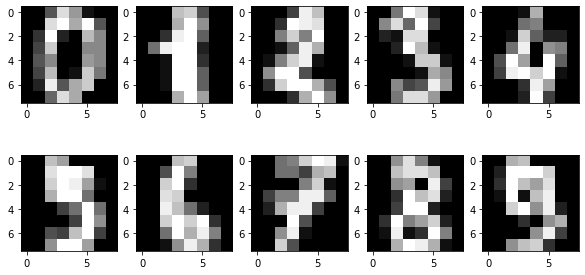

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
plt.figure(figsize=[10,5])
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.gray()
  plt.imshow(digits.images[i]) 

## Data splitting

In [8]:
X=digits.images.reshape(len(digits.images),-1)
y=digits.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

## Prediction using Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print('The accuracy is ',accuracy)
print('F1 score is ',f1_score(y_test,y_pred,average='weighted'))
confusion_matrix(y_test,y_pred)

The accuracy is  0.8472222222222222
F1 score is  0.8499421506506554


array([[34,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 28,  1,  0,  0,  0,  0,  0,  5,  1],
       [ 0,  3, 18,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  2, 25,  0,  3,  0,  1,  6,  0],
       [ 0,  1,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 41,  0,  1,  3,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  4, 22]])

## Prediction using Bernoulli Naive Bayes

In [10]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print('The accuracy is ',accuracy)
print('F1 score is ',f1_score(y_test,y_pred,average='weighted'))
confusion_matrix(y_test,y_pred)

The accuracy is  0.875
F1 score is  0.8752561647066984


array([[32,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0, 22,  4,  0,  1,  0,  0,  1,  6,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  2,  4],
       [ 0,  1,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 1,  1,  0,  0,  0, 39,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 33,  2],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  1, 25]])

## Results:

### From the above results Bernoulli Naive Bayes has the best F1-score which is 0.875